In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv(r"C:\Users\tamar\Desktop\Folder Latihan\session_5_cohort_analysis.csv",
                 parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom


In [92]:
df.shape

(379979, 8)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379979 entries, 0 to 379978
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Description  379979 non-null  object        
 3   Quantity     379979 non-null  int64         
 4   InvoiceDate  379979 non-null  datetime64[ns]
 5   UnitPrice    379979 non-null  float64       
 6   CustomerID   379979 non-null  int64         
 7   Country      379979 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 23.2+ MB


In [171]:
df_purchased = df[df['Quantity'] > 0]
df_canceled = df[df['Quantity'] < 0]

## Bulan Pertama Kali Setiap Customer Berbelanja (Acquisition Month)

In [178]:
# df['Acquisition Date'] = df.groupby('CustomerID')['InvoiceDate'].min() --> Tidak mempertahankan DataFrame Asli
df_purchased = df[df['Quantity'] > 0].copy() #Update
df_purchased.loc[:,'Acquisition Month'] = df_purchased.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [179]:
df_purchased.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Acquisition Month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,2011-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,2011-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,2011-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,2011-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,2011-04


## Bulan Transaksi (Transaction Month)

In [180]:
df_purchased['Transaction Month'] = df_purchased['InvoiceDate'].dt.to_period('M')

In [181]:
df_purchased.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Acquisition Month,Transaction Month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,2011-04,2011-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,2011-04,2011-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,2011-04,2011-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,2011-04,2011-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,2011-04,2011-04


## Cohort Table

In [182]:
cohort_table = df_purchased.groupby(['Acquisition Month', 'Transaction Month'])[['CustomerID']].nunique().reset_index()
cohort_table.rename(columns={'CustomerID':'n_user'}, inplace=True)
cohort_table

,Acquisition Month,Transaction Month,n_user
0,2011-01,2011-01,875
1,2011-01,2011-02,270
2,2011-01,2011-03,315
3,2011-01,2011-04,292
4,2011-01,2011-05,328
...,...,...,...
73,2011-10,2011-11,58
74,2011-10,2011-12,9
75,2011-11,2011-11,259
76,2011-11,2011-12,11


In [183]:
cohort_table['Period Month'] = cohort_table['Transaction Month'].dt.month - cohort_table['Acquisition Month'].dt.month
cohort_table.head()

,Acquisition Month,Transaction Month,n_user,Period Month
0,2011-01,2011-01,875,0
1,2011-01,2011-02,270,1
2,2011-01,2011-03,315,2
3,2011-01,2011-04,292,3
4,2011-01,2011-05,328,4


In [184]:
cohort_table['Acquisition Month']= cohort_table['Acquisition Month'].dt.month

In [185]:
cohort_table = cohort_table.pivot_table(values='n_user',
                                        columns='Period Month',
                                        index='Acquisition Month')
cohort_table

Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisition Month,,,,,,,,,,,,
1,875.0,270.0,315.0,292.0,328.0,344.0,350.0,290.0,351.0,340.0,405.0,150.0
2,536.0,123.0,127.0,159.0,145.0,154.0,140.0,159.0,155.0,188.0,55.0,NaN
3,505.0,96.0,122.0,110.0,119.0,108.0,120.0,127.0,141.0,35.0,NaN,NaN
4,375.0,80.0,72.0,78.0,73.0,73.0,98.0,89.0,17.0,NaN,NaN,NaN
5,319.0,56.0,65.0,52.0,80.0,56.0,89.0,20.0,NaN,NaN,NaN,NaN
6,306.0,53.0,45.0,51.0,55.0,78.0,17.0,NaN,NaN,NaN,NaN,NaN
7,258.0,53.0,48.0,48.0,64.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
8,194.0,37.0,43.0,54.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,270.0,39.0,54.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Konversi Value n_user dalam bentuk proporsi (percentage)

In [186]:
cohort_analysis = cohort_table.apply(lambda x: x/x.iloc[0]*100, axis=0)
cohort_analysis

Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisition Month,,,,,,,,,,,,
1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
2,61.257143,45.555556,40.317460,54.452055,44.207317,44.767442,40.000000,54.827586,44.159544,55.294118,13.580247,NaN
3,57.714286,35.555556,38.730159,37.671233,36.280488,31.395349,34.285714,43.793103,40.170940,10.294118,NaN,NaN
4,42.857143,29.629630,22.857143,26.712329,22.256098,21.220930,28.000000,30.689655,4.843305,NaN,NaN,NaN
5,36.457143,20.740741,20.634921,17.808219,24.390244,16.279070,25.428571,6.896552,NaN,NaN,NaN,NaN
6,34.971429,19.629630,14.285714,17.465753,16.768293,22.674419,4.857143,NaN,NaN,NaN,NaN,NaN
7,29.485714,19.629630,15.238095,16.438356,19.512195,2.616279,NaN,NaN,NaN,NaN,NaN,NaN
8,22.171429,13.703704,13.650794,18.493151,3.963415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30.857143,14.444444,17.142857,1.369863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
cohort_analysis = cohort_table.apply(lambda x: x/x.iloc[0]*100, axis=1)
cohort_analysis

Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisition Month,,,,,,,,,,,,
1,100.0,30.857143,36.000000,33.371429,37.485714,39.314286,40.000000,33.142857,40.114286,38.857143,46.285714,17.142857
2,100.0,22.947761,23.694030,29.664179,27.052239,28.731343,26.119403,29.664179,28.917910,35.074627,10.261194,NaN
3,100.0,19.009901,24.158416,21.782178,23.564356,21.386139,23.762376,25.148515,27.920792,6.930693,NaN,NaN
4,100.0,21.333333,19.200000,20.800000,19.466667,19.466667,26.133333,23.733333,4.533333,NaN,NaN,NaN
5,100.0,17.554859,20.376176,16.300940,25.078370,17.554859,27.899687,6.269592,NaN,NaN,NaN,NaN
6,100.0,17.320261,14.705882,16.666667,17.973856,25.490196,5.555556,NaN,NaN,NaN,NaN,NaN
7,100.0,20.542636,18.604651,18.604651,24.806202,3.488372,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,19.072165,22.164948,27.835052,6.701031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,14.444444,20.000000,1.481481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cohort Analysis')

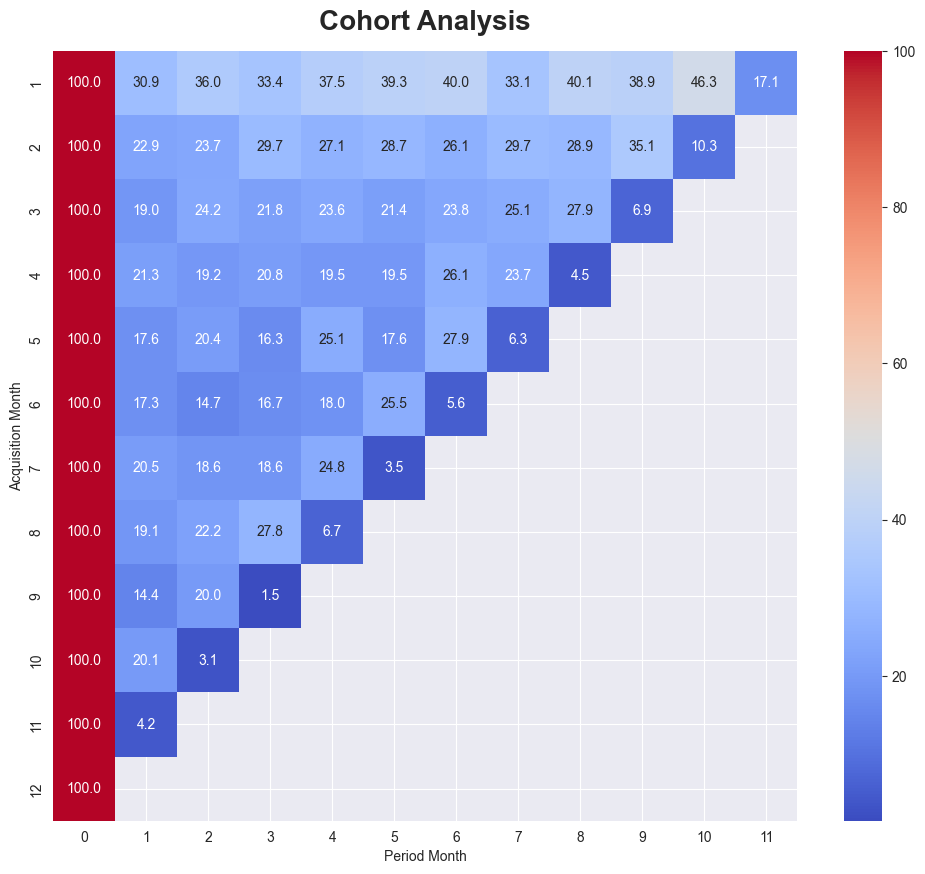

In [188]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
ax = sns.heatmap(cohort_analysis, fmt='.1f', annot=True, cmap='coolwarm')
ax.set_title("Cohort Analysis", fontdict={'fontsize': 20,
                                          'fontweight':'bold'}, pad=15)

# Recency, Frequency, Monetery (RFM)

- Recency:
    - Seberapa lama customer terakhir membeli di perusahaan kita
    - Semakin tinggi nilai R maka semakin lama (usang) customer terakhir membeli
    - Semakin kecil nilai R maka semakin baru customer terakhir membeli (ini yang diharapkan)
- Frequency:
    - Seberapa sering (freq) customer membeli produk
    - Semakin tinggi F maka semakin banyak produk yang dibeli per customer (ini yang diharapkan)
- Monetary:
    - Seberapa banyak (nominal) pembelian yang dikeluarkan oleh customer
    - Semakin tinggi nilai M maka semakin besar nominal pembelian (ini yang diharapkan)

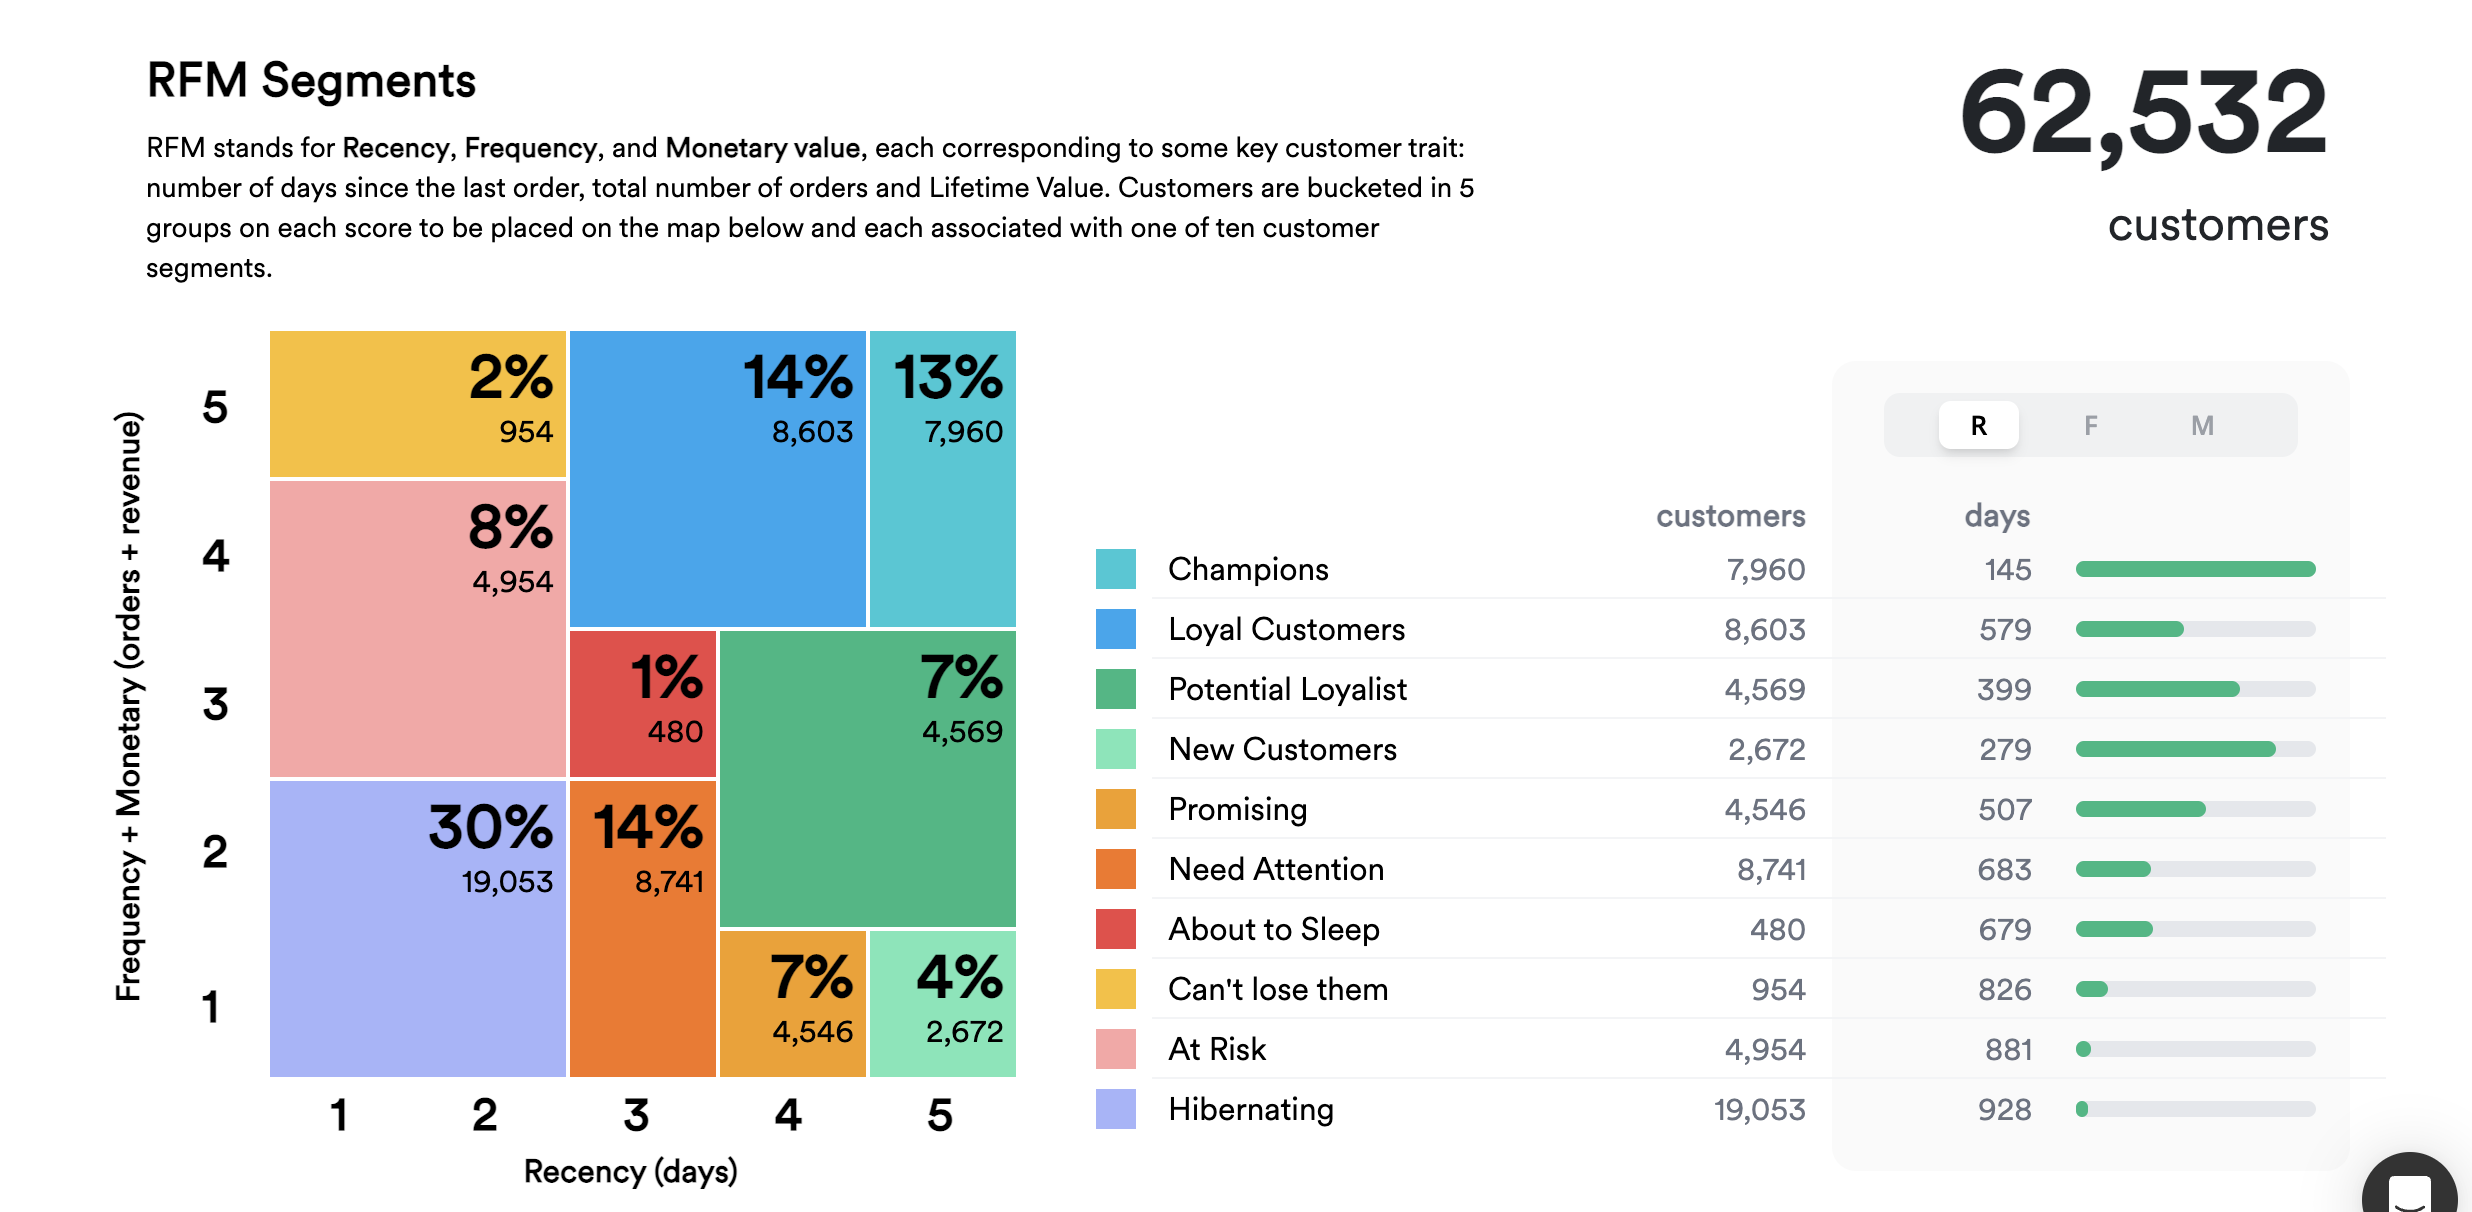

# 1. Data Pre-Processing sebelum menghitung RFM:

In [105]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Acquisition Month,Transaction Month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313,United Kingdom,2011-04,2011-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,2011-04,2011-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313,United Kingdom,2011-04,2011-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313,United Kingdom,2011-04,2011-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313,United Kingdom,2011-04,2011-04


In [106]:
columns_to_drop = ['Country', 'Acquisition Month', 'Transaction Month']
df = df.drop(columns=columns_to_drop)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379979 entries, 0 to 379978
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Description  379979 non-null  object        
 3   Quantity     379979 non-null  int64         
 4   InvoiceDate  379979 non-null  datetime64[ns]
 5   UnitPrice    379979 non-null  float64       
 6   CustomerID   379979 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 20.3+ MB


- **Untuk kemudahan penjelasan, ambil contoh data pembelian dari customer dengan id '12346'**
- Pada kolom 'Quantity' baris 11270, terlihat bahwa customer melakukan pembelian sejumlah 74215 unit.
- Kemudian, 17 menit kemudian (lihat 'InvoiceDate') pada baris 11275, customer melakukan **cancel order**. Terlihar dari 'Quantity' nya yang bernilai (-) minus, dan 'InvoiceNo' diberi inisial 'C'

In [108]:
df[df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
11270,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346
11275,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346


Maka:
- Diasumsikan bahwa InvoiceNo dengan inisial C adalah invoice 'CANCEL ORDER'.
- Untuk memeriksa asumsi ini, saya cek dengan kode berikut:

In [109]:
cancel_invoice =[x for x in df['InvoiceNo'] if 'C' in x]
minus_qty = [x for x in df['Quantity'] if x < 0]
if len(cancel_invoice) == len(minus_qty): #read: jika jumlah baris invoice berinisial C = jumlah baris kolom Qty dengan value < 0, maka:
    print("Asumsi benar. Qty bernilai minus ditandai dengan huruf C di awal No.Invoice")
else:
    print("cek lagi")

Asumsi benar. Qty bernilai minus ditandai dengan huruf C di awal No.Invoice


- Karena asumsi saya benar bahwa: **InvoiceNo dengan inisial C adalah invoice 'CANCEL ORDER'**, maka kita harus mengeluarkan **setiap customerID yang jumlah (sum) 'Quantity' nya = 0**

1. Pertama, saya hitung jumlah (sum) 'Quantity' dari masing-masing CustID:

In [110]:
total_qty_per_cust = df.groupby('CustomerID').agg({'Quantity': 'sum'}).reset_index()
total_qty_per_cust

,CustomerID,Quantity
0,12346,0
1,12347,2139
2,12348,1087
3,12349,631
4,12350,197
...,...,...
4239,18280,45
4240,18281,54
4241,18282,98
4242,18283,1397


2. Setelah mengetahui 'Quantity' untuk masing-masing 'CustID', sekarang kita keluarkan / exclude **seluruh CustomerID yang sum quantity-nya = 0** , dan hanya memproses data di mana sum qty dari setiap customer > 0

In [111]:
above_zero_qty = total_qty_per_cust[total_qty_per_cust['Quantity'] > 0]
above_zero_qty.head()

,CustomerID,Quantity
1,12347,2139
2,12348,1087
3,12349,631
4,12350,197
5,12352,470


In [112]:
above_zero_qty.shape

(4199, 2)

In [113]:
zero_and_below_qty = total_qty_per_cust[total_qty_per_cust['Quantity'] <= 0]
zero_and_below_qty.head()

,CustomerID,Quantity
0,12346,0
88,12454,0
124,12503,-1
126,12505,-1
167,12558,0


In [114]:
zero_and_below_qty.shape

(45, 2)

3. df_filtered di bawah ini adalah dataframe yang sudah difilter dan siap untuk analisa RFM

In [115]:
df_filtered = df[df['CustomerID'].isin(above_zero_qty['CustomerID'])]
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313
1,539993,21499,BLUE POLKADOT WRAP,25,2011-04-01 10:00:00,0.42,13313
2,539993,21498,RED RETROSPOT WRAP,25,2011-04-01 10:00:00,0.42,13313
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313


In [116]:
df_filtered.shape

(379480, 7)

# 2. RFM Siap Dihitung:
## Recency

### Current Date

In [117]:
current_date = df_filtered['InvoiceDate'].max() #Anggap ini adalah current date/ tanggal sekarang/ tanggal analisis
current_date

Timestamp('2011-12-10 17:19:00')

In [118]:
latest_transaction = df_filtered.groupby('CustomerID')['InvoiceDate'].max().reset_index()
latest_transaction

,CustomerID,InvoiceDate
0,12347,2011-10-31 12:25:00
1,12348,2011-09-25 13:13:00
2,12349,2011-11-21 09:51:00
3,12350,2011-02-02 16:01:00
4,12352,2011-09-28 14:58:00
...,...,...
4194,18280,2011-07-03 09:52:00
4195,18281,2011-12-06 10:53:00
4196,18282,2011-09-08 15:10:00
4197,18283,2011-11-30 12:59:00


In [119]:
recency = df_filtered.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days}).reset_index()
recency.columns = ['CustomerID', 'Recency']
recency

,CustomerID,Recency
0,12347,40
1,12348,76
2,12349,19
3,12350,311
4,12352,73
...,...,...
4194,18280,160
4195,18281,4
4196,18282,93
4197,18283,10


## Frequency

In [120]:
freq = df_filtered.groupby('CustomerID').size().reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq

,CustomerID,Frequency
0,12347,151
1,12348,14
2,12349,73
3,12350,17
4,12352,95
...,...,...
4194,18280,10
4195,18281,7
4196,18282,13
4197,18283,756


## Monetary

In [121]:
# df_filtered['Total Purchase'] = df_filtered['Quantity']*df_filtered['UnitPrice'] --> will be deprecated in the future
df_filtered.loc[:,'Total Purchase'] = df_filtered['Quantity']*df_filtered['UnitPrice']
monetary = df_filtered.groupby('CustomerID')['Total Purchase'].sum().reset_index()
monetary.columns = ['CustomerID','Monetary']
monetary

C:\Users\tamar\AppData\Local\Temp\ipykernel_16212\941217541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:,'Total Purchase'] = df_filtered['Quantity']*df_filtered['UnitPrice']


,CustomerID,Monetary
0,12347,3598.21
1,12348,904.44
2,12349,1757.55
3,12350,334.40
4,12352,1545.41
...,...,...
4194,18280,180.60
4195,18281,80.82
4196,18282,176.60
4197,18283,2094.88


In [122]:
rfm = pd.merge(recency, freq, on='CustomerID').merge(monetary, on='CustomerID')

In [123]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,40,151,3598.21
1,12348,76,14,904.44
2,12349,19,73,1757.55
3,12350,311,17,334.40
4,12352,73,95,1545.41


In [124]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4199.000000,4199.000000,4199.000000,4199.000000
mean,15291.774708,88.513456,90.373899,1847.628141
std,1717.847797,88.949345,224.097832,7924.458000
min,12347.000000,0.000000,1.000000,-8.150000
25%,13811.500000,19.000000,18.000000,299.655000
50%,15286.000000,53.000000,42.000000,652.070000
75%,16770.500000,135.000000,99.000000,1585.915000
max,18287.000000,342.000000,7692.000000,270897.140000


### Dari analisa statistik deskriptif di atas, terlihat bahwa nilai terkecil Monetary masih ada yang di bawah nol. Artinya, kita perlu melakukan filter lebih lanjut pada df_filtered

In [125]:
rfm[rfm['Monetary']<=0]

,CustomerID,Recency,Frequency,Monetary
663,13256,15,1,0.000000e+00
2929,16454,45,3,-8.150000e+00
4047,18072,155,36,-5.329071e-15


### 1. Analisis Data pada Customer ID = 13256
Masalah yang ditemukan ---> UnitPrice = 0

In [126]:
df_filtered[df_filtered['CustomerID']==13256]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Purchase
352044,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256,0.0


Solusi --> cari nilai median dari item barang, kemudian isi nilai 0 dengan nilai median dari item

In [127]:
df_filtered[df_filtered['Description']=='ASSTD DESIGN 3D PAPER STICKERS']['UnitPrice'].median()

0.85

In [128]:
# df_filtered['UnitPrice'].replace(0, np.NaN, inplace = true) --> deprecated in newer version of Pandas
df_filtered.loc[df_filtered['UnitPrice'] == 0, 'UnitPrice'] = np.nan

In [129]:
df_filtered.loc[:,'UnitPrice'] = df_filtered.groupby('Description')['UnitPrice'].transform(lambda x: x.fillna(x.median()))

In [130]:
df_filtered = df_filtered.copy()
df_filtered.loc[:,'Total Purchase'] = df_filtered['Quantity']*df_filtered['UnitPrice']
monetary = df_filtered.groupby('CustomerID')['Total Purchase'].sum().reset_index()
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12347,3598.21
1,12348,904.44
2,12349,1757.55
3,12350,334.40
4,12352,1545.41


In [131]:
rfm['Monetary'] = monetary['Monetary']

### 2. Analisis Data pada Customer ID = 16454
- Masalah yang ditemukan ---> Unit Price pada index 80771 adalah 15.05, yang seharusnya adalah 1
- Solusi ---> replace nilai menjadi 1

In [132]:
df_filtered.loc[(df_filtered['CustomerID'] == 16454) & (df_filtered['UnitPrice'] == 15.05), 'UnitPrice'] = 1

In [133]:
df_filtered [df_filtered['CustomerID'] == 16454]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Purchase
80771,C549930,M,Manual,-1,2011-04-13 10:36:00,1.00,16454,-15.05
255895,569915,90012A,MIDNIGHT BLUE DROP CRYSTAL NECKLACE,2,2011-06-10 16:57:00,2.95,16454,5.90
286728,572832,M,Manual,1,2011-10-26 11:40:00,1.00,16454,1.00


### 3. Analisis Data pada Customer ID = 18072
- Masalah yang ditemukan ---> Hasil sum 'Total Purchase' sangat mendekati nol (8.881784197001252e-15), yang mengindikasikan bahwa angka idealnya adalah nol, tetapi karena masalah presisi titik mengambang, angka yang ditampilkan adalah angka bukan nol yang sangat kecil.

In [134]:
cust_18072 = df_filtered[df_filtered['CustomerID'] == 18072]
cust_18072_purchased = cust_18072[cust_18072['Quantity'] > 0]
cust_18072_canceled = cust_18072[cust_18072['Quantity'] < 0]

anomalies = set(cust_18072_purchased['StockCode']) ^ set(cust_18072_canceled['StockCode'])
anomalies

{'16043', '35471D', '85032B', '85032D', 'M'}

In [135]:
cust_18072[cust_18072['StockCode'].isin(anomalies)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Purchase
127546,555744,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,24,2011-07-06 10:44:00,0.39,18072,9.36
127548,555744,85032B,BLOSSOM IMAGES GIFT WRAP SET,12,2011-07-06 10:44:00,0.65,18072,7.80
127553,555744,16043,POP ART PUSH DOWN RUBBER,24,2011-07-06 10:44:00,0.12,18072,2.88
155581,C559347,M,Manual,-1,2011-07-07 17:22:00,2.88,18072,-2.88
155584,C559347,85032D,YULETIDE IMAGES GIFT WRAP SET,-12,2011-07-07 17:22:00,0.65,18072,-7.80
155598,C559347,M,Manual,-1,2011-07-07 17:22:00,9.36,18072,-9.36


In [136]:
cust_18072['Total Purchase'].value_counts()

Total Purchase
 15.00    4
-15.00    4
 9.96     3
-9.96     3
-7.80     2
 10.20    2
-10.20    2
 7.80     2
-9.00     1
-30.00    1
-4.56     1
-18.96    1
-2.88     1
-46.80    1
 30.00    1
 2.88     1
 46.80    1
 18.96    1
 9.36     1
 4.56     1
 9.00     1
-9.36     1
Name: count, dtype: int64

In [137]:
sum_totel_18072 = cust_18072['Total Purchase'].sum()

Solusi --> Drop seluruh baris data customer nomor 18072 dari df_filtered, karena df_filtered hanya mengandung data customer yang qty sum nya di atas nol

In [168]:
if np.isclose(sum_totel_18072, 0, atol=1e-10):
    print("Sum total mendekati nol.")
else:
    print(f"Sum total bukan nol: {sum_totel_18072}")

Sum total mendekati nol.


In [139]:
df_filtered = df_filtered.drop(df_filtered[df_filtered['CustomerID']==18072].index)

In [140]:
df_filtered = df_filtered.copy()
df_filtered.loc[:,'Total Purchase'] = df_filtered['Quantity']*df_filtered['UnitPrice']
monetary = df_filtered.groupby('CustomerID')['Total Purchase'].sum().reset_index()
monetary.columns = ['CustomerID','Monetary']
monetary

,CustomerID,Monetary
0,12347,3598.21
1,12348,904.44
2,12349,1757.55
3,12350,334.40
4,12352,1545.41
...,...,...
4193,18280,180.60
4194,18281,80.82
4195,18282,176.60
4196,18283,2094.88


In [141]:
rfm['Monetary'] = monetary['Monetary']

### Masalah selesai, ditandai dengan analisa statistik deskriptif di bawah ini, di mana nilai min kolom Monetary > 0

In [142]:
round(rfm.describe(),1)

,CustomerID,Recency,Frequency,Monetary
count,4199.0,4199.0,4199.0,4198.0
mean,15291.8,88.5,90.4,1851.2
std,1717.8,88.9,224.1,7938.2
min,12347.0,0.0,1.0,2.9
25%,13811.5,19.0,18.0,300.4
50%,15286.0,53.0,42.0,652.7
75%,16770.5,135.0,99.0,1590.7
max,18287.0,342.0,7692.0,271677.6


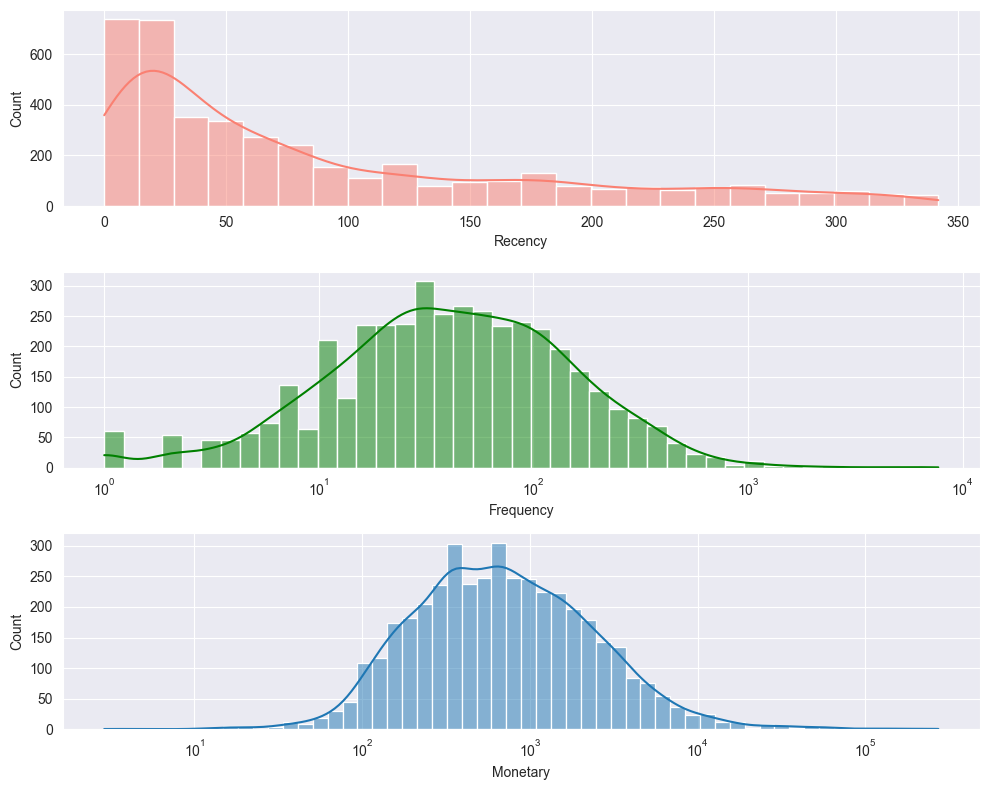

In [143]:
plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
sns.histplot(rfm['Recency'], kde = True, color= 'salmon')
plt.subplot(3,1,2)
sns.histplot(rfm['Frequency'], kde = True, log_scale= True, color='green') # Gunakan skala logaritmik untuk kejelasan visualisasi
plt.subplot(3,1,3)
sns.histplot(rfm['Monetary'], kde = True, log_scale= True)
plt.tight_layout()

### Recency
- Distribusi Grafik Recency adalah right-skewed, di mana sebagian besar customer memiliki nilai recency yang rendah.
- Banyak customer yang melakukan pembelian akhir-akhir ini, artinya masih banyak customer yang aktif. Penurunan jumlah customer seiring dengan meningkatnya nilai recency menunjukkan bahwa semakin sedikit customer yang tidak aktif dalam jangka waktu yang lama. 

### Frequency
- Grafik Frequency memiliki distribusi right-skewed dalam skala logaritmik. Sebagian besar customer memiliki frekuensi pembelian yang rendah hingga sedang.
- Meskipun sebagian besar customer memiliki frekuensi pembelian yang rendah - sedang, terdapat kelompok customer yang memiliki frekuensi pembelian lebih tinggi. Ini menunjukkan adanya kelompok customer setia atau customer berulang yang rutin melakukan pembelian (kemungkinan reseller atau dropshipper)

### Monetary
- Grafik Monetary juga memiliki distribusi right-skewed dalam skala logaritmik, di mana sebagian besar total pembelian / total purchase dari setiap customer adalah rendah.
- Sebagian besar customer cenderung menghabiskan jumlah uang yang kecil untuk belanja, tetapi ada beberapa pelanggan yang menghabiskan total pembelian yang jauh lebih tinggi daripada customer lain (outliers).

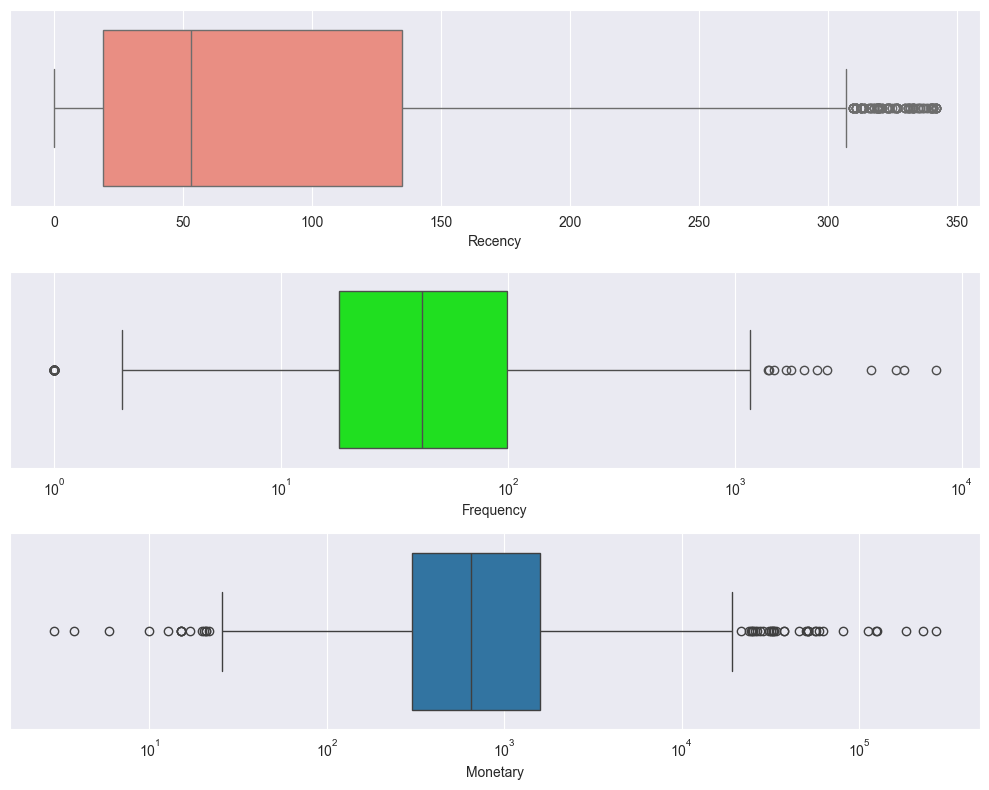

In [144]:
plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
sns.boxplot(x= rfm['Recency'], color='salmon')
plt.subplot(3,1,2)
sns.boxplot(x = rfm['Frequency'], log_scale=True, color='lime')
plt.subplot(3,1,3)
sns.boxplot(x =rfm['Monetary'], log_scale= True)
plt.tight_layout()

In [145]:
def rfm_score(baris):
    # Recency
    if baris['Recency'] <= 19:
        r = 4
    elif (baris['Recency'] > 19) and (baris['Recency'] <= 53):
        r = 3
    elif (baris['Recency'] > 53) and (baris['Recency'] <= 135):
        r = 2
    else:
        r = 1 # nilai paling kecil atau customer paling lama tidak membeli

    # Frequency
    if baris['Frequency'] <= 18:
        f = 1
    elif (baris['Frequency'] > 18) and (baris['Frequency'] <= 42):
        f = 2
    elif (baris['Frequency'] > 42) and (baris['Frequency'] <= 99):
        f = 3
    elif (baris['Frequency'] > 99) and (baris['Frequency'] <= 1000):
        f = 4
    elif (baris['Frequency'] > 1000) and (baris['Frequency'] <= 5000):
        f = 5
    else:
        f = 6 # nilai paling besar atau customer yang sering membeli

    # Monetary:
    if baris['Monetary'] <= 300:
        m = 1
    elif (baris['Monetary'] > 300) and (baris['Monetary'] <= 650):
        m = 2
    elif (baris['Monetary'] > 650) and (baris['Monetary'] <= 1600):
        m = 3
    else:
        m = 4 # nilai paling besar atau customer yang paling banyak rata-rata nominal belinya

    return r + f + m


rfm['RFM_Score'] = rfm.apply(rfm_score, axis = 1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RFM_Score
0,12347,40,151,3598.21,11
1,12348,76,14,904.44,6
2,12349,19,73,1757.55,11
3,12350,311,17,334.40,4
4,12352,73,95,1545.41,8


Text(0.5, 1.0, 'Distribusi Skor RFM')

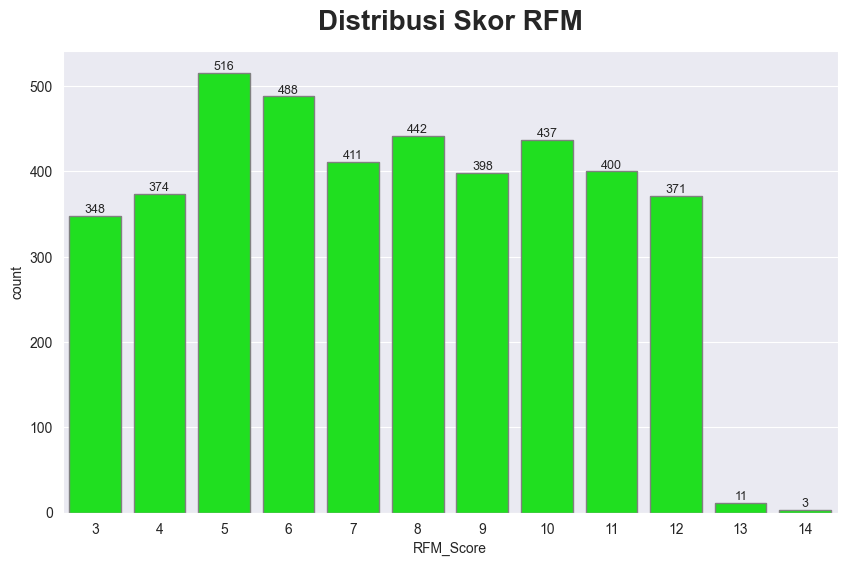

In [146]:
plt.figure(figsize= (10,6))
ax = sns.countplot(data=rfm, x='RFM_Score', color='lime', edgecolor = 'grey')
ax.bar_label(ax.containers[0], fontsize = 9)
ax.set_title("Distribusi Skor RFM", fontdict={'fontsize': 20, 'fontweight':'bold'}, pad=15)

In [147]:
def rfm_score(baris):
    # Recency
    if baris['Recency'] <= 19:
        r = 4
    elif (baris['Recency'] > 19) and (baris['Recency'] <= 53):
        r = 3
    elif (baris['Recency'] > 53) and (baris['Recency'] <= 135):
        r = 2
    else:
        r = 1 # nilai paling kecil atau customer paling lama tidak membeli

    # Frequency
    if baris['Frequency'] <= 18:
        f = 1
    elif (baris['Frequency'] > 18) and (baris['Frequency'] <= 42):
        f = 2
    elif (baris['Frequency'] > 42) and (baris['Frequency'] <= 99):
        f = 3
    elif (baris['Frequency'] > 99) and (baris['Frequency'] <= 1000):
        f = 4
    elif (baris['Frequency'] > 1000) and (baris['Frequency'] <= 5000):
        f = 5
    else:
        f = 6 # nilai paling besar atau customer yang sering membeli

    # Monetary:
    if baris['Monetary'] <= 300:
        m = 1
    elif (baris['Monetary'] > 300) and (baris['Monetary'] <= 650):
        m = 2
    elif (baris['Monetary'] > 650) and (baris['Monetary'] <= 1600):
        m = 3
    else:
        m = 4 # nilai paling besar atau customer yang paling banyak rata-rata nominal belinya

    return str(r) + str(f) + str(m)


rfm['RFM_Segment_Score'] = rfm.apply(rfm_score, axis = 1)
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,RFM_Segment_Score
0,12347,40,151,3598.21,11,344
1,12348,76,14,904.44,6,213
2,12349,19,73,1757.55,11,434
3,12350,311,17,334.40,4,112
4,12352,73,95,1545.41,8,233
...,...,...,...,...,...,...
4194,18280,160,10,80.82,3,111
4195,18281,4,7,176.60,6,411
4196,18282,93,13,2094.88,7,214
4197,18283,10,756,1837.28,12,444


In [148]:
rfm['RFM_Score'].describe()

count    4199.000000
mean        7.489879
std         2.789388
min         3.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        14.000000
Name: RFM_Score, dtype: float64

In [149]:
def rfm_segment(baris):
    if baris['RFM_Score'] > 10: # > 10
        return 'Champions'
    elif (baris['RFM_Score'] <= 10) and (baris['RFM_Score'] >= 7): # 7 - 10
        return 'Loyal Customers'
    elif (baris['RFM_Score'] < 7) and (baris['RFM_Score'] >= 5): # 5 - 7
        return 'Potential Loyalist'
    elif (baris['RFM_Score'] < 5) and (baris['RFM_Score'] >= 3): # 3 - 5
        return 'Needs Attention'
    else:
        return 'Almost Lost/ Hibernating' #  <3

rfm['RFM_Segment'] = rfm.apply(rfm_segment, axis = 1)
rfm

,CustomerID,Recency,Frequency,Monetary,RFM_Score,RFM_Segment_Score,RFM_Segment
0,12347,40,151,3598.21,11,344,Champions
1,12348,76,14,904.44,6,213,Potential Loyalist
2,12349,19,73,1757.55,11,434,Champions
3,12350,311,17,334.40,4,112,Needs Attention
4,12352,73,95,1545.41,8,233,Loyal Customers
...,...,...,...,...,...,...,...
4194,18280,160,10,80.82,3,111,Needs Attention
4195,18281,4,7,176.60,6,411,Potential Loyalist
4196,18282,93,13,2094.88,7,214,Loyal Customers
4197,18283,10,756,1837.28,12,444,Champions


Text(0.5, 1.0, 'Customer Criteria')

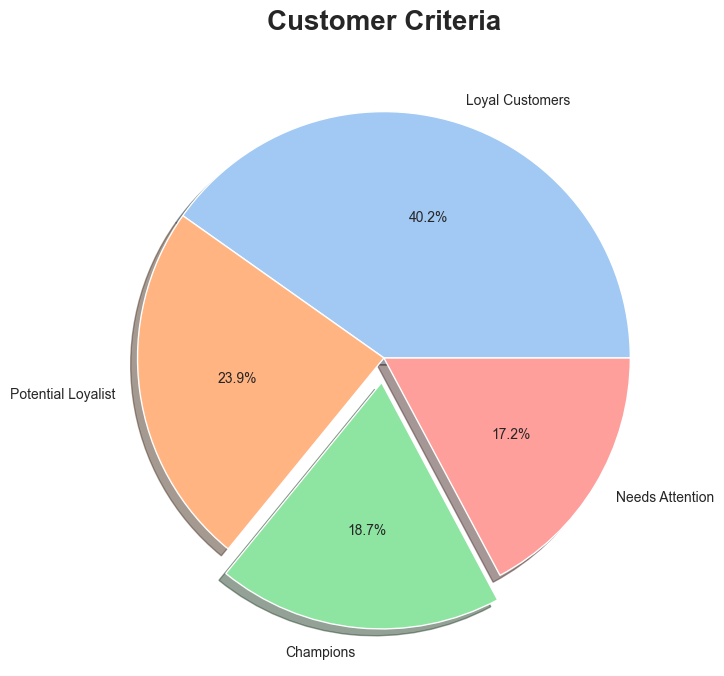

In [167]:
plt.figure(figsize=(8,8))
rfm_proportion = rfm['RFM_Segment'].value_counts()/len(rfm)*100
colors = sns.color_palette('pastel')
sns.set_style('darkgrid')
explode = [0.1 if label == 'Champions' else 0 for label in rfm_proportion.index]
plt.pie(rfm_proportion, labels = rfm_proportion.index,
        autopct = '%1.1f%%',
        explode= explode,
        shadow= True,
        colors= colors)
plt.title("Customer Criteria", fontdict={'fontsize': 20, 'fontweight':'bold'}, pad=15)

In [169]:
rfm[rfm['RFM_Segment'] == 'Champions']

,CustomerID,Recency,Frequency,Monetary,RFM_Score,RFM_Segment_Score,RFM_Segment
0,12347,40,151,3598.21,11,344,Champions
2,12349,19,73,1757.55,11,434,Champions
11,12359,9,254,6245.53,12,444,Champions
12,12360,53,129,2662.06,11,344,Champions
14,12362,12,274,5154.58,12,444,Champions
...,...,...,...,...,...,...,...
4162,18230,10,87,2066.17,11,434,Champions
4171,18241,10,105,2232.49,12,444,Champions
4181,18257,40,123,1962.30,11,344,Champions
4197,18283,10,756,1837.28,12,444,Champions
